In [1]:
import pandas as pd
import numpy as np
import Higgs
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    fromHB5Table1,
    readHEPDataCsv,
)
from Higgs import predictions as HP
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution

BR_Z_ll = 2 * 3.3658e-2  # from 2020 PDG



# ATLAS 13TeV LHC

## `vbfH > inv` [1809.06682](https://arxiv.org/abs/1809.06682)

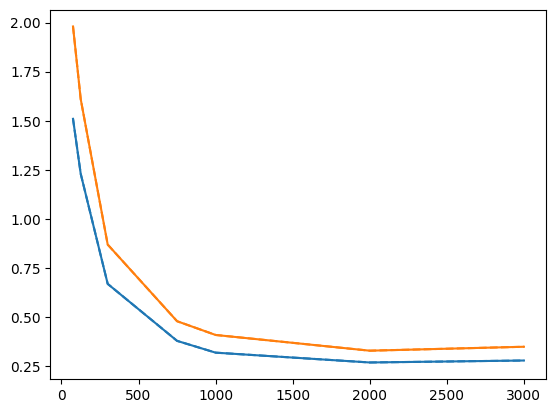

Looks good. Saving this to vbfH_LHC13_ATLAS_36.json


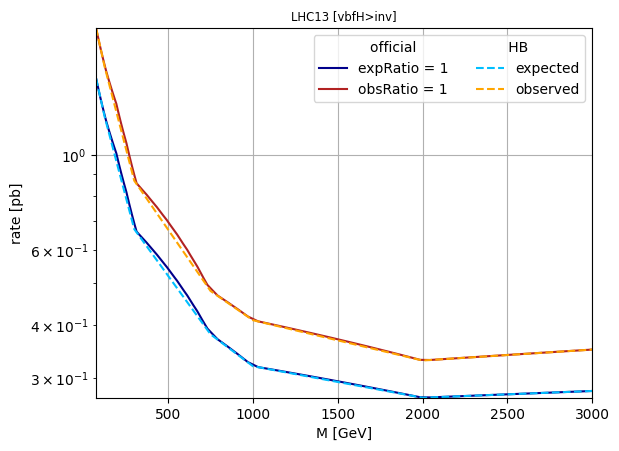

In [2]:
df = pd.DataFrame(
    {
        "m": [75, 125, 300, 750, 1000, 2000, 3000],
        "obs": [1.98, 1.61, 0.87, 0.48, 0.41, 0.33, 0.35],
        "exp": [1.51, 1.23, 0.67, 0.38, 0.32, 0.27, 0.28],
    }
)

limitFile = implementChannelLimit(
    "1809.06682",
    {"channels": [["vbfH", "inv"]]},
    "Fig. 6b/Aux. Tab. 5",
    df,
    massResolution=resolution.inv["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `h125 > inv` combination 7+8+13TeV [1904.05105](https://arxiv.org/abs/1904.05105)

Commented out because superseded by new result including full Run 2 data: 2301.10731 (see below)

In [3]:
# df = pd.DataFrame({"m": [125], "obs": [0.26], "exp": [0.17]})
# prods = ["H", "HW", "HZ"]
# limitFile = implementChannelLimit(
#     "1904.05105",
#     {"channels": [[p, "inv"] for p in prods]},
#     "Tab. 1",
#     df,
#     luminosity=4.7 + 20.3 + 36.1,
#     massResolution={"absolute": 10, "relative": 0},  # +-5GeV, guess
#     constraints={
#         "modelLike": "SMHiggsInterp",
#         "process": {"channels": [[p, "none"] for p in prods]},
#     },
#     normalization={
#         "reference": "SMHiggsInterp",
#         "process": {"channels": [[p, "none"] for p in prods]},
#     },
# )
# lim = HB.Limit(limitFile)
# # only one datapoint, so the plot is empty and the automatic validation script
# # doesn't do anything
# pred = Higgs.Predictions()
# h = pred.addParticle(HP.NeutralScalar("h", "even"))
# h.setMass(125)
# HP.effectiveCouplingInput(
#     h,
#     HP.smLikeEffCouplings,
#     reference="SMHiggsInterp")
# h.setBr("bb", 0)  # creates some space in the BRs
# h.setBr("directInv", df.exp[0] - h.br("inv"))
# assert np.isclose(lim.apply(pred)[0].expRatio(), 1)
# h.setBr("directInv", 0)
# h.setBr("directInv", df.obs[0] - h.br("inv"))
# assert np.isclose(lim.apply(pred)[0].obsRatio(), 1)


Looks good. Saving this to comb_LHC13_ATLAS_61.json


## `h125 > inv` combination 7+8+13TeV [2301.10731](https://arxiv.org/abs/2301.10731)

In [2]:
df = pd.DataFrame({"m": [125], "obs": [0.107], "exp": [0.077]})
prods = ["H", "HW", "HZ","Htt"]
limitFile = implementChannelLimit(
    2626403,
    {"channels": [[p, "inv"] for p in prods]},
    "Tab. 1",
    df,
    luminosity=4.7 + 20.3 + 139,
    massResolution={"absolute": 10, "relative": 0},  # +-5GeV, guess
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prods]},
    },
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prods]},
    },
)
lim = HB.Limit(limitFile)
# only one datapoint, so the plot is empty and the automatic validation script
# doesn't do anything
pred = Higgs.Predictions()
h = pred.addParticle(HP.NeutralScalar("h", "even"))
h.setMass(125)
HP.effectiveCouplingInput(
    h,
    HP.smLikeEffCouplings,
    reference="SMHiggsInterp")
h.setBr("bb", 0)  # creates some space in the BRs
h.setBr("directInv", df.exp[0] - h.br("inv"))
assert np.isclose(lim.apply(pred)[0].expRatio(), 1)
h.setBr("directInv", 0)
h.setBr("directInv", df.obs[0] - h.br("inv"))
assert np.isclose(lim.apply(pred)[0].obsRatio(), 1)


Looks good. Saving this to comb_LHC13_ATLAS_164.json


## `ZH > inv +ll` [1708.09624](https://arxiv.org/abs/1708.09624)

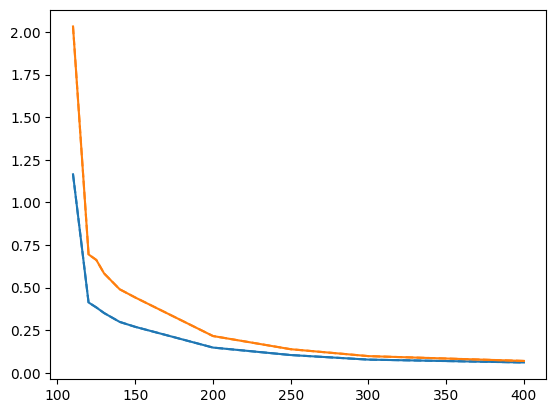

Looks good. Saving this to qqHZ_LHC13_ATLAS_36.json


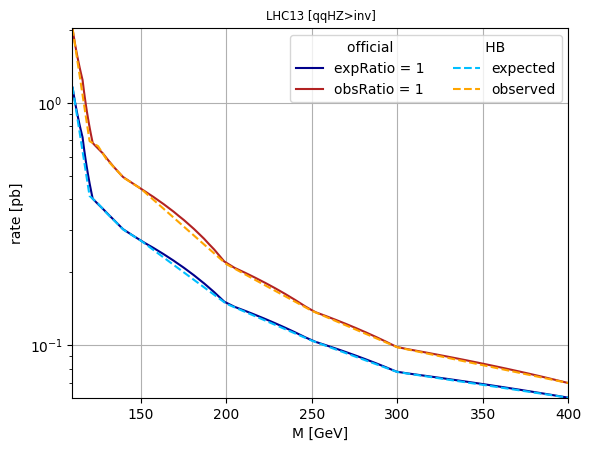

In [4]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1620909/Table%207/1/csv"
)
df = dfs[1].rename(
    columns={
        "Higgs Mass [GeV]": "m",
        r"95% Limit on $\sigma_{ZH}\times B(Z\rightarrow ee + \mu\mu) \times B(H\rightarrow inv)$ [fb]": "obs",
    }
)
df["exp"] = dfs[0][
    r"95% Limit on $\sigma_{ZH}\times B(Z\rightarrow ee + \mu\mu) \times B(H\rightarrow inv)$ [fb]"
]
df.obs *= 1e-3 / BR_Z_ll
df.exp *= 1e-3 / BR_Z_ll

limitFile = implementChannelLimit(
    "1708.09624",
    {"channels": [["qqHZ", "inv"]]},
    "https://doi.org/10.17182/hepdata.80461.v1/t7",
    df,
    massResolution=resolution.inv["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


# ATLAS 8TeV LHC

## `ZH > inv` full Run1 [1402.3244](https://arxiv.org/abs/1402.3244)

Multiple different luminosity values: [20.3, 4.5] using 20.3 unless you set it manually


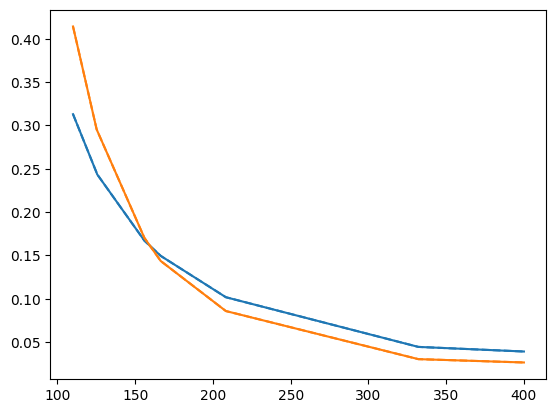

Looks good. Saving this to HZ_LHC8_ATLAS_25.json


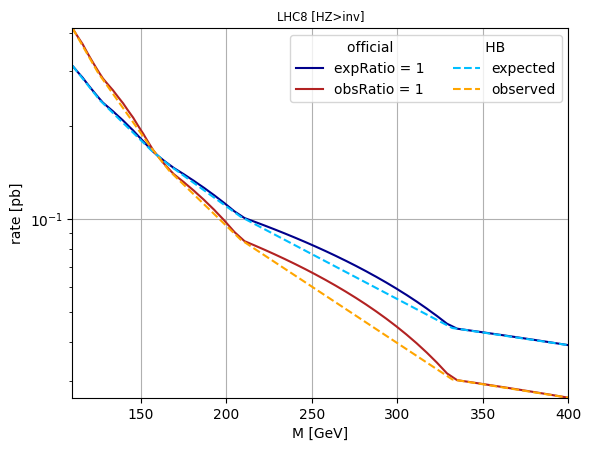

In [5]:
df = fromHB5Table1("3244_Atlas_H-inv_24.8fb-1", "ATLAS")
df.obs *= 1e-3
df.exp *= 1e-3
limitFile = implementChannelLimit(
    1281236,
    {"channels": [["HZ", "inv"]]},
    "Fig. 3",
    df,
    collider="LHC8",
    luminosity=20.3 + 4.5,
    massResolution=resolution.inv["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `VH > inv` full Run1 [1504.04324](https://arxiv.org/abs/1504.04324)


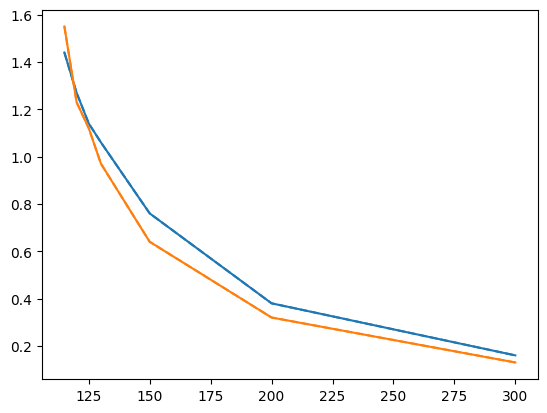

Looks good. Saving this to HV_LHC8_ATLAS_20.json


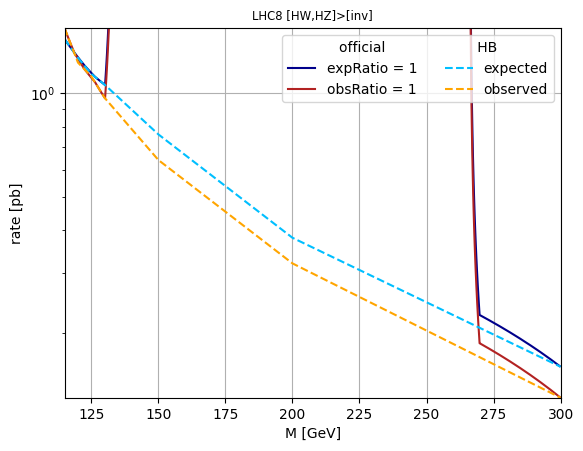

In [6]:
df = pd.DataFrame(
    data={
        "m": [115, 120, 125, 130, 150, 200, 300],
        "obs": [1.55, 1.23, 1.12, 0.97, 0.64, 0.32, 0.13],
        "exp": [1.44, 1.27, 1.14, 1.06, 0.76, 0.38, 0.16],
    }
)

prods = ["HW", "HZ"]
limitFile = implementChannelLimit(
    "1504.04324",
    {"channels": [[p, "inv"] for p in prods]},
    "Fig. 6",
    df,
    massResolution=resolution.inv["default"],
    constraints={
        "modelLike": "SMHiggs",
        "process": {"channels": [[p, "none"] for p in prods]},
    },
)
lim = HB.Limit(limitFile)


def VHAssumption(h, rate):
    """Setup the VH cxns to fulfill the SM assumption."""
    sm = HP.SMHiggs(h.mass())
    sumSm = sum((sm.cxn(lim.collider(), p) for p in prods))
    for p in ["qqHZ", "HW"]:
        h.setCxn(lim.collider(), p, rate * (sm.cxn(lim.collider(), p) / sumSm))


fig, ax = validateChannelLimit(lim, setAdditionalRates=VHAssumption)


## `pp > H > inv + jets` run1 combination [1502.01518](https://arxiv.org/abs/1502.01518)


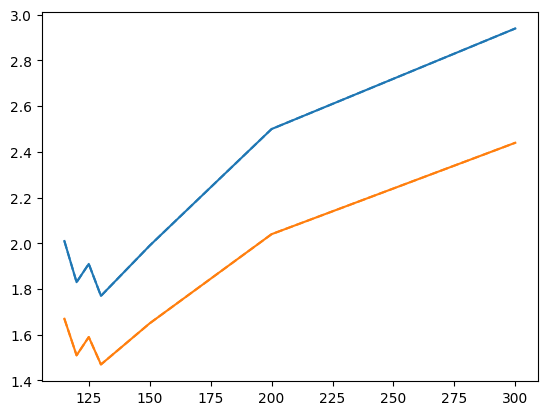

Looks good. Saving this to comb_LHC8_ATLAS_20.json
using effective coupling input for SM-normalized limit
assuming only production is normalized for inv decay


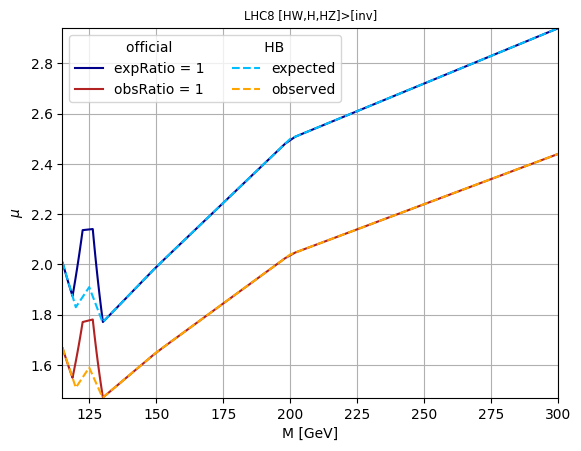

In [7]:
df = pd.DataFrame(
    data={
        "m": [115, 120, 125, 130, 150, 200, 300],
        "obs": [1.67, 1.51, 1.59, 1.47, 1.65, 2.04, 2.44],
        "exp": [2.01, 1.83, 1.91, 1.77, 1.99, 2.5, 2.94],
    }
)
prods = ["H", "HW", "HZ"]
limitFile = implementChannelLimit(
    "1502.01518",
    {"channels": [[p, "inv"] for p in prods]},
    "Aux. Tab. 11",
    df,
    massResolution=resolution.inv["default"],
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prods]},
    },
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prods]},
    },
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
